In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tracks_df = pd.read_csv('Datafiles/SpotifyFeatures.csv')

In [3]:
print(tracks_df.head(5))
print(tracks_df.dtypes)
print(tracks_df.describe())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

In [4]:
targets = ['popularity']
columns = 'acousticness danceability energy instrumentalness liveness loudness speechiness tempo valence'.split()
popular = tracks_df[tracks_df['popularity'] > 75]

#sns.pairplot(popular[columns + targets])

Text(0.5, 1.0, 'Correlation Matrix')

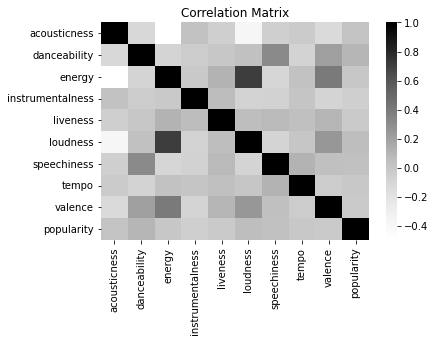

In [5]:
ax = plt.axes()
sns.heatmap(popular[columns + targets].corr(), cmap='Greys')
ax.set_title('Correlation Matrix')

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(popular, test_size=0.2)

In [8]:
scaler = StandardScaler(copy=False)
train[columns + targets] = scaler.fit_transform(train[columns + targets])
test[columns + targets] = scaler.transform(test[columns + targets])

In [9]:
pca_components = 3
pca = PCA(n_components=pca_components)
new_train_values = pca.fit_transform(train[columns])
new_test_values = pca.transform(test[columns])

new_columns = []
for index in range(pca_components):
    name = 'pca' + str(index)
    train.loc[:, name] = new_train_values[:, index]
    test.loc[:, name] = new_test_values[:, index]
    new_columns.append(name)

Text(0.5, 1.0, 'Correlation Matrix')

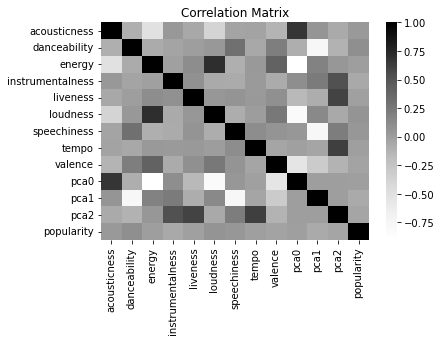

In [10]:
ax = plt.axes()
sns.heatmap(train[columns + new_columns + targets].corr(), cmap='Greys')
ax.set_title('Correlation Matrix')

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

# Input layer
model.add(Dense(len(new_columns), activation='relu'))
#model.add(Dropout(0.25))

# Hidden layer
model.add(Dense(5, activation='relu'))
#model.add(Dropout(0.25))

# Hidden layer
model.add(Dense(3, activation='relu'))
#model.add(Dropout(0.25))

# Output layer
model.add(Dense(1, activation='linear'))


# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20)
model.fit(x=train[new_columns].values,
          y=train[targets].values.ravel(),
          epochs=1000,
          callbacks=[early_stop]
         )

            pca0      pca1      pca2
66894   1.655043  0.359260 -1.430686
111038 -1.537992  1.974174  2.257156
66688   0.116906 -1.315151  0.579262
9058    0.314386 -0.142241 -1.032620
108567  2.841321  1.462300  3.623912
Epoch 1/1000
74/74 [==============================] - 0s 725us/step - loss: 1.0701
Epoch 2/1000
74/74 [==============================] - 0s 650us/step - loss: 1.0140
Epoch 3/1000
74/74 [==============================] - 0s 699us/step - loss: 1.0025
Epoch 4/1000
74/74 [==============================] - 0s 668us/step - loss: 0.9987
Epoch 5/1000
74/74 [==============================] - 0s 642us/step - loss: 0.9966
Epoch 6/1000
74/74 [==============================] - 0s 657us/step - loss: 0.9955
Epoch 7/1000
74/74 [==============================] - 0s 653us/step - loss: 0.9950
Epoch 8/1000
74/74 [==============================] - 0s 637us/step - loss: 0.9940
Epoch 9/1000
74/74 [==============================] - 0s 603us/step - loss: 0.9933
Epoch 10/1000
74/74 [==========

Epoch 96/1000
74/74 [==============================] - 0s 617us/step - loss: 0.9669
Epoch 97/1000
74/74 [==============================] - 0s 601us/step - loss: 0.9659
Epoch 98/1000
74/74 [==============================] - 0s 625us/step - loss: 0.9660
Epoch 99/1000
74/74 [==============================] - 0s 638us/step - loss: 0.9664
Epoch 100/1000
74/74 [==============================] - 0s 609us/step - loss: 0.9657
Epoch 101/1000
74/74 [==============================] - 0s 629us/step - loss: 0.9653
Epoch 102/1000
74/74 [==============================] - 0s 612us/step - loss: 0.9657
Epoch 103/1000
74/74 [==============================] - 0s 623us/step - loss: 0.9650
Epoch 104/1000
74/74 [==============================] - 0s 616us/step - loss: 0.9663
Epoch 105/1000
74/74 [==============================] - 0s 624us/step - loss: 0.9653
Epoch 106/1000
74/74 [==============================] - 0s 631us/step - loss: 0.9652
Epoch 107/1000
74/74 [==============================] - 0s 635us/step

74/74 [==============================] - 0s 773us/step - loss: 0.9614
Epoch 193/1000
74/74 [==============================] - 0s 644us/step - loss: 0.9612
Epoch 194/1000
74/74 [==============================] - 0s 641us/step - loss: 0.9607
Epoch 195/1000
74/74 [==============================] - 0s 640us/step - loss: 0.9613
Epoch 196/1000
74/74 [==============================] - 0s 621us/step - loss: 0.9619
Epoch 197/1000
74/74 [==============================] - 0s 625us/step - loss: 0.9608
Epoch 198/1000
74/74 [==============================] - 0s 611us/step - loss: 0.9607
Epoch 199/1000
74/74 [==============================] - 0s 629us/step - loss: 0.9612
Epoch 200/1000
74/74 [==============================] - 0s 629us/step - loss: 0.9611
Epoch 201/1000
74/74 [==============================] - 0s 669us/step - loss: 0.9610
Epoch 202/1000
74/74 [==============================] - 0s 638us/step - loss: 0.9612
Epoch 203/1000
74/74 [==============================] - 0s 632us/step - loss: 0.

74/74 [==============================] - 0s 634us/step - loss: 0.9587
Epoch 289/1000
74/74 [==============================] - 0s 624us/step - loss: 0.9587
Epoch 290/1000
74/74 [==============================] - 0s 621us/step - loss: 0.9581
Epoch 291/1000
74/74 [==============================] - 0s 648us/step - loss: 0.9586
Epoch 292/1000
74/74 [==============================] - 0s 629us/step - loss: 0.9584
Epoch 293/1000
74/74 [==============================] - 0s 658us/step - loss: 0.9577
Epoch 294/1000
74/74 [==============================] - 0s 635us/step - loss: 0.9592
Epoch 295/1000
74/74 [==============================] - 0s 636us/step - loss: 0.9582
Epoch 296/1000
74/74 [==============================] - 0s 730us/step - loss: 0.9583
Epoch 297/1000
74/74 [==============================] - 0s 667us/step - loss: 0.9580
Epoch 298/1000
74/74 [==============================] - 0s 636us/step - loss: 0.9580
Epoch 299/1000
74/74 [==============================] - 0s 643us/step - loss: 0.

74/74 [==============================] - 0s 647us/step - loss: 0.9560
Epoch 385/1000
74/74 [==============================] - 0s 628us/step - loss: 0.9557
Epoch 386/1000
74/74 [==============================] - 0s 644us/step - loss: 0.9554
Epoch 387/1000
74/74 [==============================] - 0s 631us/step - loss: 0.9555
Epoch 388/1000
74/74 [==============================] - 0s 629us/step - loss: 0.9557
Epoch 389/1000
74/74 [==============================] - 0s 657us/step - loss: 0.9555
Epoch 390/1000
74/74 [==============================] - 0s 646us/step - loss: 0.9559
Epoch 391/1000
74/74 [==============================] - 0s 641us/step - loss: 0.9553
Epoch 392/1000
74/74 [==============================] - 0s 634us/step - loss: 0.9560
Epoch 393/1000
74/74 [==============================] - 0s 643us/step - loss: 0.9554
Epoch 394/1000
74/74 [==============================] - 0s 619us/step - loss: 0.9554
Epoch 395/1000
74/74 [==============================] - 0s 631us/step - loss: 0.

<AxesSubplot:>

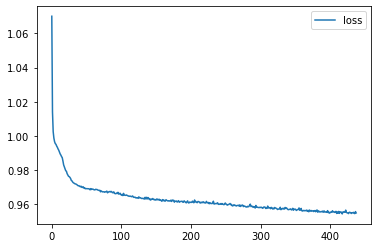

In [16]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
predictions = model.predict(test[new_columns])
print(np.hstack([predictions, test[targets]]))

19/19 [==============================] - 0s 810us/step
[[-0.05371391 -0.7221406 ]
 [ 0.35178795  0.42837859]
 [-0.45460361 -0.95224443]
 ...
 [-0.09320085 -0.95224443]
 [-0.34910077 -0.95224443]
 [-0.31379992 -0.95224443]]
